In [6]:
from diffusers import StableDiffusionPipeline
from optimum.quanto import quantize, freeze, qint8
import torch

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
quantize(pipeline.unet, weights=qint8)
quantize(pipeline.text_encoder, weights=qint8)
quantize(pipeline.vae, weights=qint8)
freeze(pipeline.unet)
freeze(pipeline.text_encoder)
freeze(pipeline.vae)
pipeline.text_encoder = pipeline.text_encoder.half()
torch.cuda.empty_cache()

pipeline.load_textual_inversion("./results/learned_embeds-steps-30000.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

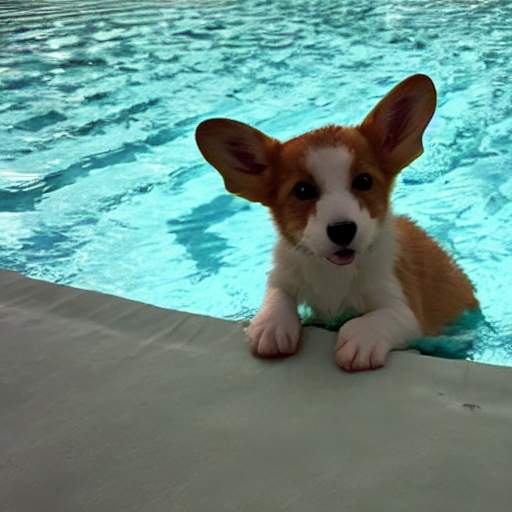

In [12]:
image = pipeline("a photo of sks swimming in the pool", num_inference_steps=50, guidance_scale=7.5).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

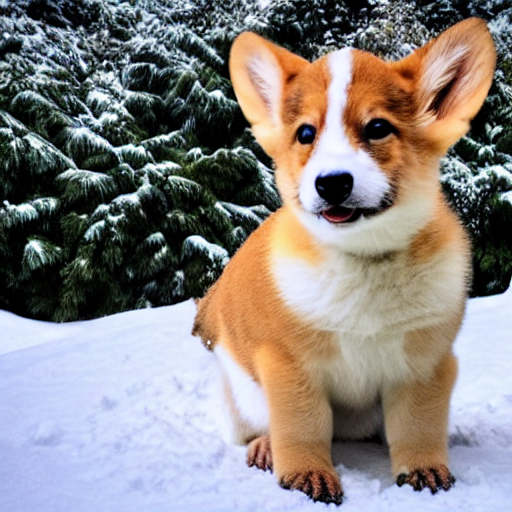

In [19]:
image = pipeline("a photo of sks wearing in the snow", num_inference_steps=50, guidance_scale=7.5).images[0]
image